# 🚴‍♂️ Time Series Forecasting: Daily Bike Rentals in DC


# 🚴‍♂️ Time Series Forecasting: Daily Bike Rentals in DC

**Goal:** Predict the total number of daily bike rentals using weather, calendar, and time-aware features.


## 1. Load and Inspect Data


In [ ]:
import pandas as pd

# Load the data
df = pd.read_csv('day.csv')

# Preview the data
df.head()


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [ ]:
# Basic info
df.info()

# Check for missing values
print("\nMissing values:\n", df.isnull().sum())

# Summary stats
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB

Missing values:
 instant       0
dteday        0
season        0
yr            0
mnth       

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [ ]:
# Check unique values
print(df['yr'].unique())

# Convert to int if needed
df['yr'] = df['yr'].astype(int)


[0 1]


## 2. Visualize Trends and Seasonality


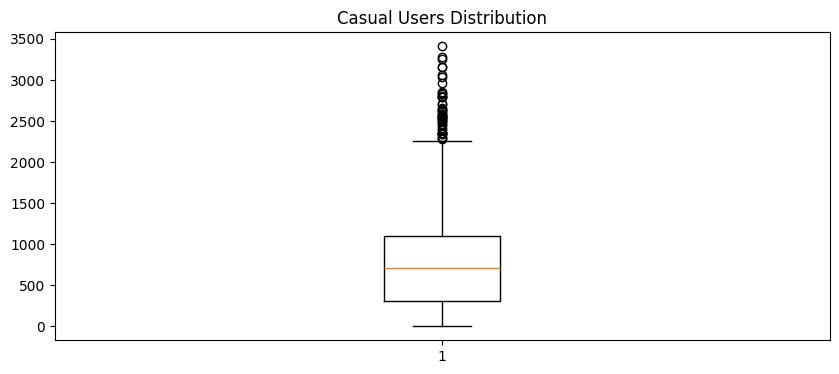

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 4))
plt.boxplot(df['casual'])
plt.title('Casual Users Distribution')
plt.show()


/tmp/ipython-input-5-4007934056.py:14: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


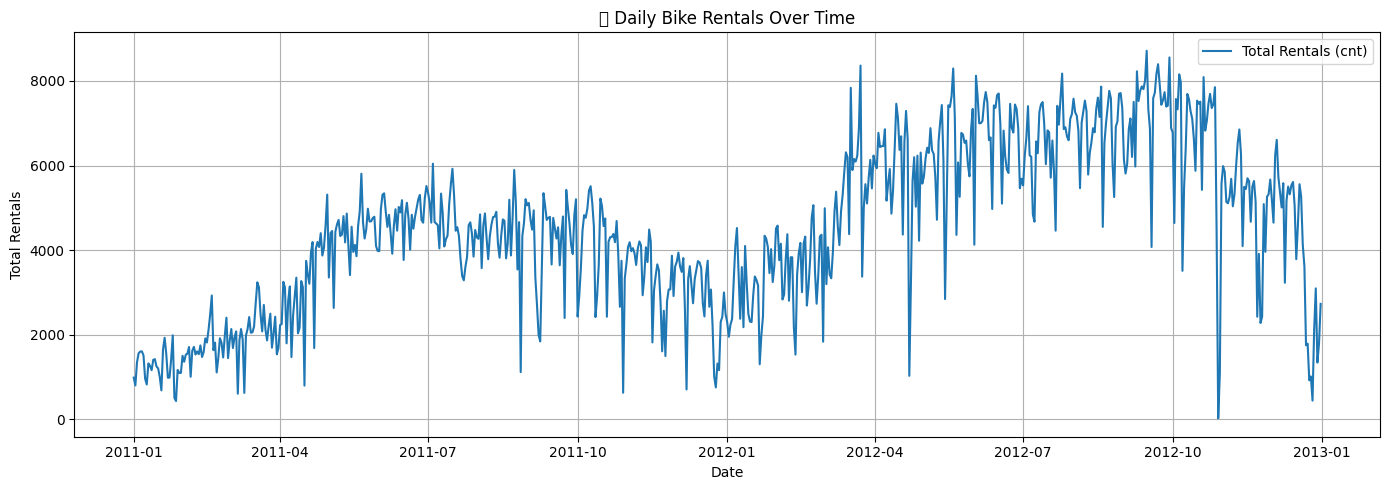

In [ ]:
# Convert date column
df['dteday'] = pd.to_datetime(df['dteday'])

# Line plot of total rides
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 5))
plt.plot(df['dteday'], df['cnt'], label='Total Rentals (cnt)')
plt.title('📈 Daily Bike Rentals Over Time')
plt.xlabel('Date')
plt.ylabel('Total Rentals')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


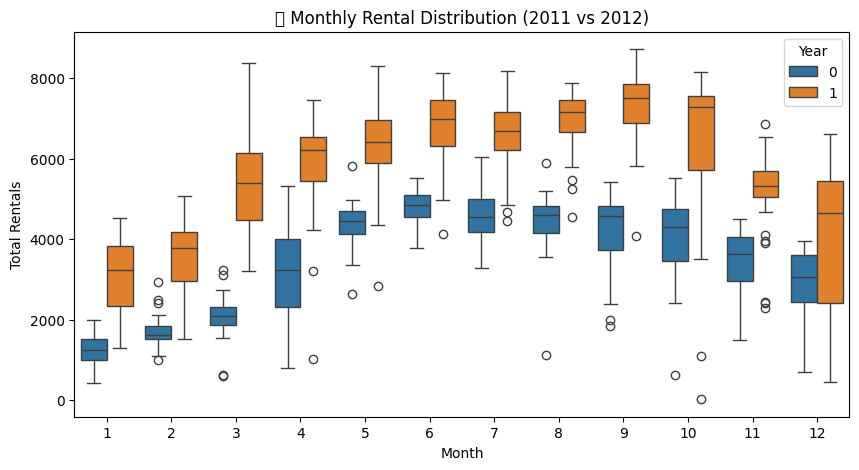

In [ ]:
import seaborn as sns

plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x='mnth', y='cnt', hue='yr')
plt.title('📦 Monthly Rental Distribution (2011 vs 2012)')
plt.xlabel('Month')
plt.ylabel('Total Rentals')
plt.legend(title='Year')
plt.show()


## 3. Clean Data and Remove Outliers


In [ ]:
df[df['cnt'] == 0]


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt


In [ ]:
# Remove 0-rental day
df = df[df['cnt'] != 0]


## 4. Feature Engineering (Time Series)


In [ ]:
# Copy dataframe to avoid touching original
df_fe = df.copy()

# --- Time-based features ---
df_fe['dayofweek'] = df_fe['dteday'].dt.dayofweek
df_fe['month'] = df_fe['dteday'].dt.month
df_fe['quarter'] = df_fe['dteday'].dt.quarter

# --- Lag features ---
df_fe['lag_1'] = df_fe['cnt'].shift(1)   # yesterday
df_fe['lag_7'] = df_fe['cnt'].shift(7)   # same weekday last week

# --- Rolling averages ---
df_fe['rolling_mean_3'] = df_fe['cnt'].shift(1).rolling(3).mean()
df_fe['rolling_mean_7'] = df_fe['cnt'].shift(1).rolling(7).mean()

# Drop NA rows created by lag/rolling
df_fe = df_fe.dropna()

df_fe.head()


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,...,casual,registered,cnt,dayofweek,month,quarter,lag_1,lag_7,rolling_mean_3,rolling_mean_7
7,8,2011-01-08,1,0,1,0,6,0,2,0.165000,...,68,891,959,5,1,1,1510.0,985.0,1572.000000,1344.714286
8,9,2011-01-09,1,0,1,0,0,0,1,0.138333,...,54,768,822,6,1,1,959.0,801.0,1358.333333,1341.000000
9,10,2011-01-10,1,0,1,0,1,1,1,0.150833,...,41,1280,1321,0,1,1,822.0,1349.0,1097.000000,1344.000000
10,11,2011-01-11,1,0,1,0,2,1,2,0.169091,...,43,1220,1263,1,1,1,1321.0,1562.0,1034.000000,1340.000000
11,12,2011-01-12,1,0,1,0,3,1,1,0.172727,...,25,1137,1162,2,1,1,1263.0,1600.0,1135.333333,1297.285714


## 5. Train-Test Split (Time-Based)


In [ ]:
# Set target and features
target = 'cnt'

features = [
    'season', 'yr', 'mnth', 'holiday', 'workingday', 'weathersit',
    'temp', 'atemp', 'hum', 'windspeed',
    'dayofweek', 'month', 'quarter',
    'lag_1', 'lag_7', 'rolling_mean_3', 'rolling_mean_7'
]

X = df_fe[features]
y = df_fe[target]

# Time-based train-test split: use 80% for training, 20% for testing
split_idx = int(len(X) * 0.8)

X_train, X_test = X[:split_idx], X[split_idx:]
y_train, y_test = y[:split_idx], y[split_idx:]

X_train.shape, X_test.shape


((579, 17), (145, 17))

## 6. Modeling


### 🔹 Linear Regression


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Initialize and train model
lr = LinearRegression()
lr.fit(X_train, y_train)

# Predict
y_pred_lr = lr.predict(X_test)

# Evaluate
mae_lr = mean_absolute_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
r2_lr = r2_score(y_test, y_pred_lr)

print("📊 Linear Regression Performance:")
print(f"MAE:  ${mae_lr:.2f}")
print(f"RMSE: ${rmse_lr:.2f}")
print(f"R²:   {r2_lr:.3f}")


📊 Linear Regression Performance:
MAE:  $709.23
RMSE: $984.84
R²:   0.725


### 🔹 Random Forest Regressor


In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Initialize and train Random Forest
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predict
y_pred_rf = rf.predict(X_test)

# Evaluate
mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)

print("🌲 Random Forest Performance:")
print(f"MAE:  ${mae_rf:.2f}")
print(f"RMSE: ${rmse_rf:.2f}")
print(f"R²:   {r2_rf:.3f}")


🌲 Random Forest Performance:
MAE:  $773.60
RMSE: $1028.87
R²:   0.700


In [ ]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_leaf': [1, 2, 4],
    'min_samples_split': [2, 5]
}

# Initialize model
rf_base = RandomForestRegressor(random_state=42)

# GridSearch
grid = GridSearchCV(
    estimator=rf_base,
    param_grid=param_grid,
    cv=3,
    n_jobs=-1,
    verbose=1,
    scoring='neg_root_mean_squared_error'
)

# Fit to training data
grid.fit(X_train, y_train)

# Best model
best_rf = grid.best_estimator_

# Predict
y_pred_best = best_rf.predict(X_test)

# Evaluate
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

mae = mean_absolute_error(y_test, y_pred_best)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_best))
r2 = r2_score(y_test, y_pred_best)

print("✅ Tuned Random Forest Performance:\n")
print(f"MAE:  ${mae:.2f}")
print(f"RMSE: ${rmse:.2f}")
print(f"R²:   {r2:.3f}")
print("\nBest Hyperparameters:")
print(grid.best_params_)


Fitting 3 folds for each of 36 candidates, totalling 108 fits
✅ Tuned Random Forest Performance:

MAE:  $773.60
RMSE: $1028.87
R²:   0.700

Best Hyperparameters:
{'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


## 7. Model Comparison and Evaluation


In [ ]:
# Compare Linear Regression and Random Forest
print("📊 Linear Regression:")
print(f"MAE:  ${mae_lr:.2f}")
print(f"RMSE: ${rmse_lr:.2f}")
print(f"R²:   {r2_lr:.3f}")

print("\n🌲 Random Forest:")
print(f"MAE:  ${mae_rf:.2f}")
print(f"RMSE: ${rmse_rf:.2f}")
print(f"R²:   {r2_rf:.3f}")


📊 Linear Regression:
MAE:  $709.23
RMSE: $984.84
R²:   0.725

🌲 Random Forest:
MAE:  $773.60
RMSE: $1028.87
R²:   0.700


## 8. Visualizing Predictions vs Actual:



/tmp/ipython-input-15-1078863363.py:12: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


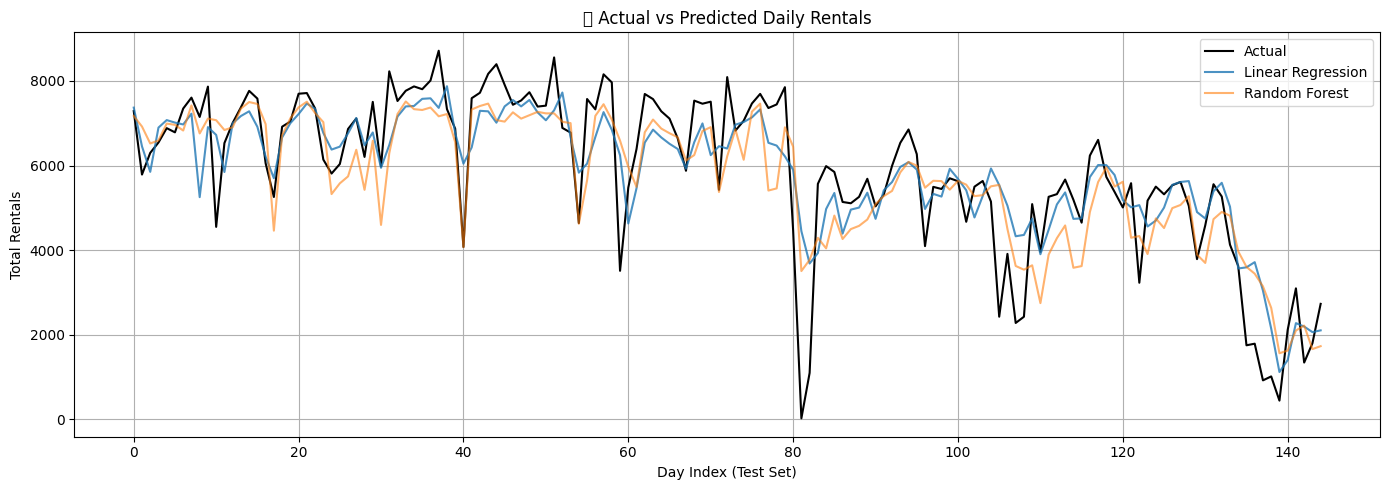

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 5))
plt.plot(y_test.values, label='Actual', color='black')
plt.plot(y_pred_lr, label='Linear Regression', alpha=0.8)
plt.plot(y_pred_rf, label='Random Forest', alpha=0.6)
plt.title('📈 Actual vs Predicted Daily Rentals')
plt.ylabel('Total Rentals')
plt.xlabel('Day Index (Test Set)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


- A simple Linear Regression model outperformed Random Forest in this time series project.
- Seasonality and lag features provided strong predictive power.
- This project shows that understanding data structure can outperform adding model complexity.
